# Data Wrangling: Cleaning for a proper analysis

In this section, we will clean up the data so that it can be properly analyzed and used in machine learning, selecting relevant information that can provide valuable insights from the data.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

First, let's import the data.

In [64]:
df = pd.read_csv('coaster_db.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

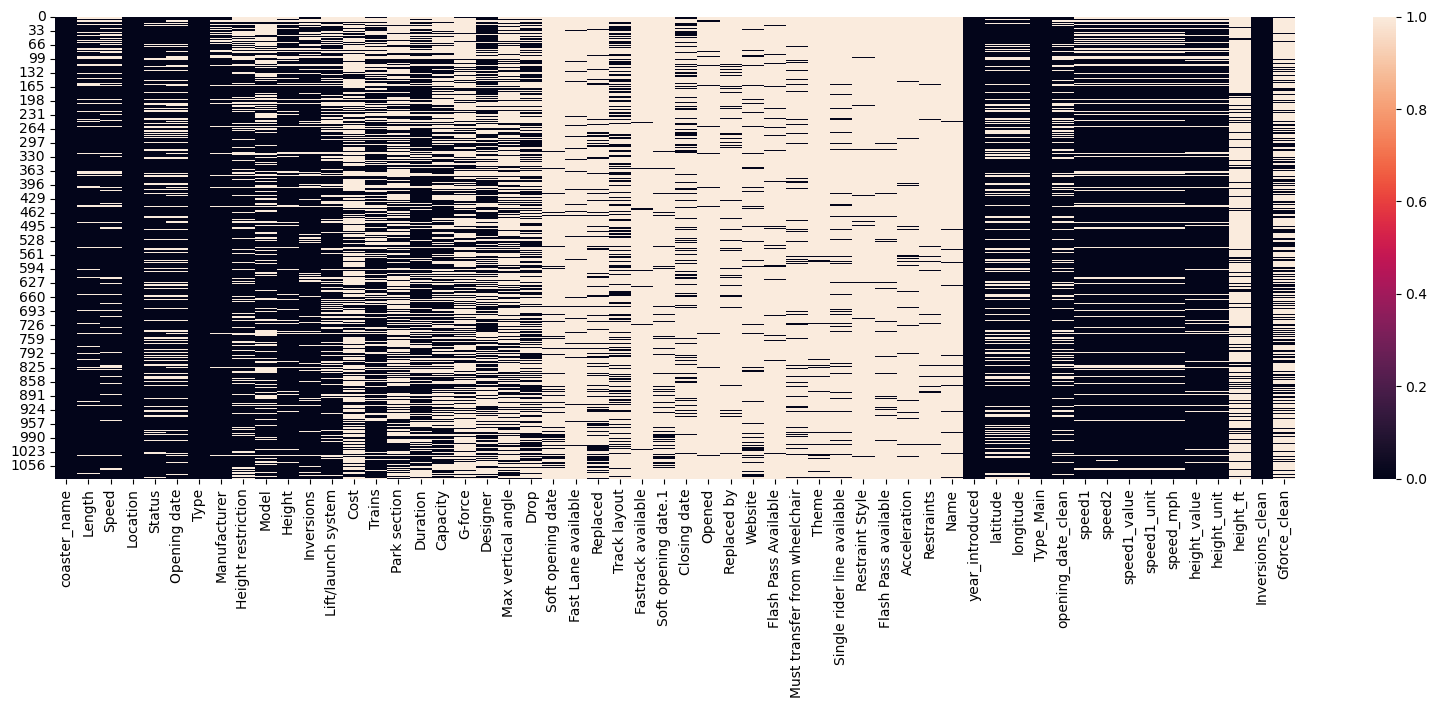

In [65]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull());

In [66]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  29435
Total information:  60872


There are some interesting characteristics that we can work with to systematically clean our data. As we proceed with the cleaning process, it is important to be mindful of any potential loss of information that may occur, whether intentionally or not. We must take measures to minimize such losses and preserve the integrity of our data. By doing so, we can ensure that our analysis is based on a reliable and accurate dataset. Here are some of our dataset characteristics:

<b>Number of columns: </b>56 <br>

<b>Number of numerical features:</b>10 <br>

<b>Number of categorical features (object):</b>46 <br>

<b>Missing information: </b>29435 out of 60816 (48%) <br>

<span style="color:red"> <b> Lost Information: </b> </span> <br> None.

Certainly, there may be numerical features that are incorrectly labeled as categorical, such as `Height Restriction`, which can lead to improper data analysis. Therefore, it is essential to conduct a thorough investigation of the data to ensure that each feature is accurately represented in its proper form. By doing so, we can avoid any misinterpretation of the data and ensure that our analysis is reliable and accurate. 

## 1. Raw Features

As per the author's description, some features have undergone a cleaning process, but the raw features have not been discarded. We should consider discarding the raw features to avoid any confusion or duplication of data. Additionally, we should address the redundancy issue related to the feature `height_value`, which serves as a complement to `height_ft`. Since both features measure height in feet, we can consider consolidating them into a single feature to eliminate redundancy.

In [67]:
ft_ind = (df['height_unit'] == 'ft')

df.loc[ft_ind, 'height_ft'] = df.loc[ft_ind, 'height_value'] 

raw_features = ['G-force', 'Inversions', 'speed1', 
                'speed2','speed1_value', 'speed1_unit', 
                'Speed', 'height_unit', 'height_value',
                'Height', 'Opening date', 'Opened']

df_old = df.copy()

df = df.drop(raw_features, axis = 1)

In [68]:
len(df.columns)

44

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Location                       1087 non-null   object 
 3   Status                         874 non-null    object 
 4   Type                           1087 non-null   object 
 5   Manufacturer                   1028 non-null   object 
 6   Height restriction             831 non-null    object 
 7   Model                          744 non-null    object 
 8   Lift/launch system             795 non-null    object 
 9   Cost                           382 non-null    object 
 10  Trains                         718 non-null    object 
 11  Park section                   487 non-null    object 
 12  Duration                       765 non-null    o

In [70]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  25333
Total information:  47828


<b>Number of columns: </b>44 <br>

<b>Number of numerical features:</b>6 <br>

<b>Number of categorical features (object):</b>38 <br>

<b>Missing information: </b>25333 out of 47828 (52%) <br>

<span style="color:red"> <b> Lost Information: </b> </span> <br> Raw text from some numerical features.

## 2. Other Numerical Cleaning

As previously discussed, some numerical features may have been inaccurately labeled as object types due to the presence of text information in the feature. This can hinder the pandas ability to properly interpret these features as numerical values. However, we have taken steps to address this issue and ensure that all numerical features are accurately represented in our dataset. In the following cells, we have performed a thorough cleaning of each numerical feature, which will enable us to move forward with our analysis confidently and accurately.

### 2.1. Length

In [71]:
length = df.loc[:, 'Length'].str.split('(').str[0]
length = length.str.replace(',', '')
length_value_unit = length.str.split('\xa0')
length_value = length_value_unit.str[0]
length_unit = length_value_unit.str[1]

ch_ind1 = (length_value == '2693 or 2700')
ch_ind2 = (length_value == '3559.7 ft')
ch_ind3 = (length_value == '2759–2798')
ch_ind4 = (length_value == '1040[2]')

length_value.loc[ch_ind1] = '2693'
length_value.loc[ch_ind2] = '3559.7'
length_value.loc[ch_ind3] = '2780'
length_value.loc[ch_ind4] = '1040'

m_ind = (length_unit == 'm')

df.loc[:, 'length_ft'] = length_value.astype(float)

df.loc[m_ind, 'length_ft'] *= 3.28084

df = df.drop('Length', axis = 1)

### 2.2. Drop

In [72]:
fall = df.loc[:, 'Drop'].str.split('(').str[0]
fall = fall.str.replace(',', '')
fall_value_unit = fall.str.split('\xa0')
fall_value = fall_value_unit.str[0]
fall_unit = fall_value_unit.str[1]

fall_value_ind = fall_value.str.contains('\[').fillna(False)
fall_value_trash = fall_value[fall_value_ind].str.split('\[')
fall_value_ = fall_value_trash.str[0]

fall_value[fall_value_ind] = fall_value_

ch_ind1 = (fall_value == '84.5 ft')
ch_ind2 = (fall_value == '116.1 ft')

fall_value.loc[ch_ind1] = '84.5'
fall_value.loc[ch_ind2] = '116.1'

m_ind = (fall_unit == 'm')

df.loc[:, 'fall_ft'] = fall_value.astype(float)

df.loc[m_ind, 'fall_ft'] *= 3.28084

df = df.drop('Drop', axis = 1)

### 2.3. Max Vertical Angle

In [73]:
angle_value = df.loc[:, 'Max vertical angle'].str.replace('°', '')
angle_value.loc[35] = '40'


angle_value_ind = angle_value.str.contains('\[').fillna(False)
angle_value_trash = angle_value[angle_value_ind].str.split('\[')
angle_value_ = angle_value_trash.str[0]

angle_value[angle_value_ind] = angle_value_

angle_value = angle_value.astype(float)

df.loc[:, 'max_angle'] = angle_value

df = df.drop('Max vertical angle', axis=1)

### 2.4. Height Restriction

In [74]:
res = df.loc[:, 'Height restriction'].str.split('(').str[0]
res = res.str.replace(',', '')
res_value_unit = res.str.split('\xa0')
res_value = res_value_unit.str[0]
res_unit = res_value_unit.str[1]

res_value_ind = res_value.str.contains('\[').fillna(False)
res_value_trash = res_value[res_value_ind].str.split('\[')
res_value_ = res_value_trash.str[0]

res_value[res_value_ind] = res_value_

low_up_ind = res_value.str.contains('–').fillna(False)
low_up = res_value[low_up_ind].str.split('–')
low = low_up.str[0]
up = low_up.str[1]

res_value.loc[low_up_ind] = low

ch_ind1 = (res_value == '42 or 48')
ch_ind2 = (res_value == 'Must be able to straddle seat with feet on floor.')
ch_ind3 = (res_value == '52 in ')

res_value.loc[ch_ind1] = '45'
res_value.loc[ch_ind2] = '120'
res_value.loc[ch_ind3] = '52'

res_unit.loc[ch_ind2] = 'cm ' 

in_ind = (res_unit == 'in ') | (ch_ind3)
ft_ind = (res_unit == 'ft ')

df.loc[:, 'height_restriction_low'] = res_value.astype(float)
df.loc[:, 'height_restriction_up'] = up.astype(float)

df.loc[in_ind, 'height_restriction_low'] *= 2.54
df.loc[in_ind, 'height_restriction_up'] *= 2.54

df.loc[ft_ind, 'height_restriction_low'] *= 30.48
df.loc[ft_ind, 'height_restriction_up'] *= 30.48

df = df.drop('Height restriction', axis = 1)

### 2.5. Duration

In [75]:
clock = df.loc[:, 'Duration']


remove = ['(25 seconds from launch to brakes)', 'minutes',  'minute', 'mins', 'min', 'm',
  'Seconds', 'Second', 'seconds', 'second', 'secs', 'sec', '~', 's', 'About', 'between', 
          'approx', 'and', '.', ',', '[1]', '[2]', '[3]', '()','(2', 'Under']

for r in remove:
    clock = clock.str.replace(r, '', regex=False)
    
clock.loc[ch_ind1] = '48'
clock.loc[48] = '1 30'
clock.loc[905] = '8'
clock.loc[842] = '2'

## Alterar separação por ':'
clock1_ind = clock.str.contains(':').fillna(False)
clock1_min_sec = clock.loc[clock1_ind].str.split(':')
clock1_min = clock1_min_sec.str[0]
clock1_sec = clock1_min_sec.str[1]


# Retirar a referência
clock1_sec_ind = clock1_sec.str.contains('\[').fillna(False)
clock1_sec_trash = clock1_sec[clock1_sec_ind].str.split('\[')
clock1_sec_ = clock1_sec_trash.str[0]
clock1_sec[clock1_sec_ind] = clock1_sec_

clock.loc[clock1_ind] = np.nan

## Alterar separação por ' '
clock2_ind = clock.str.contains(' ').fillna(False)
clock2_min_sec = clock.loc[clock2_ind].str.split(' ')
clock2_min = clock2_min_sec.str[0]
clock2_sec = clock2_min_sec.str[1]

clock.loc[clock2_ind] = np.nan
clock2_min.loc[clock2_min == ''] = 0
clock2_sec.loc[clock2_sec == ''] = 0

clock3_min = clock.dropna()

clock1_min = clock1_min.astype(float)
clock1_sec = clock1_sec.astype(float)
clock2_min = clock2_min.astype(float)
clock2_sec = clock2_sec.astype(float)
clock3_min = clock3_min.astype(float)

df.loc[:, 'ride_min'] = np.nan
df.loc[clock1_min.index, 'ride_min'] = clock1_min
df.loc[clock2_min.index, 'ride_min'] = clock2_min
df.loc[clock3_min.index, 'ride_min'] = clock3_min

df.loc[:, 'ride_sec'] = np.nan
df.loc[clock1_sec.index, 'ride_sec'] = clock1_sec
df.loc[clock2_sec.index, 'ride_sec'] = clock2_sec

secs_mask = (df.loc[:, 'ride_min'] > 10)
mins_mask = (df.loc[:, 'ride_sec'] < 10) & (df.loc[:, 'ride_min'] == 0.)

df.loc[secs_mask, 'ride_sec'] = df.loc[secs_mask, 'ride_min']
df.loc[secs_mask, 'ride_min'] = 0

df.loc[mins_mask, 'ride_min'] = df.loc[mins_mask, 'ride_sec']
df.loc[mins_mask, 'ride_sec'] = 0

df.loc[:, 'duration'] = df.loc[:, 'ride_sec'] + 60 * df.loc[:, 'ride_min']

df.loc[:, 'duration']

df = df.drop(['Duration', 'ride_min', 'ride_sec'], axis = 1)

### 2.6. Capacity

In [76]:
capacity = df.loc[:, 'Capacity'].copy()

removes = ['riders per hour', '(Estimated)', '\[1\]', '\[2\]', '\[3\]', '~', ',',
           '\(Currently 192\)', '\(\)', 'max.']

for r in removes:
    capacity = capacity.str.replace(r, '', regex=True)

ch_ind1 = (capacity == '1280–1400 ')
ch_ind2 = (capacity == '600-675 ')
ch_ind3 = (capacity == '1100-1500 ')
ch_ind4 = (capacity == '700-800 ')
ch_ind5 = (capacity == '480-720 ')
ch_ind6 = (capacity == '155000')

capacity.loc[ch_ind1] = '1400'
capacity.loc[ch_ind2] = '675'
capacity.loc[ch_ind3] = '1500'
capacity.loc[ch_ind4] = '800'
capacity.loc[ch_ind5] = '720'
capacity.loc[ch_ind6] = '1550'
capacity.loc[144] = '2057'
capacity.loc[970] = '720'
    
df.loc[:, 'riders_per_hour'] = capacity.astype(float)

df = df.drop('Capacity', axis = 1)

### 2.7. Riders Per Train

In [77]:
trains = df.loc[:, 'Trains']

trains = trains.str.split('of').str[1]

trains = trains.str.replace('riders per train','', regex = False)
trains = trains.str.replace('.', '', regex = False)


trains.loc[238] = 6
trains.loc[296] = 6
trains.loc[639] = 32
trains.loc[615] = 32
trains.loc[700] = 34
trains.loc[943] = 24

df.loc[:, 'riders_per_train'] = trains.astype(float)

df = df.drop('Trains', axis=1)

### 2.8. Closing date

In [78]:
close_date = df.loc[:, 'Closing date']

months = ['January', 'February', 'March', 'April', 'May',
          'June', 'July', 'August', 'September', 'October',
          'November', 'December', ',']

other = [r'(Barnstormer)', r'(as Mulholland Madness)', 
         r'[1]', r'Tower of Terror 11)', r'(original)', 's']

'3  2019Tower of Terror ll)'

for m in months:
    close_date = close_date.str.replace(m, '')

for o in other:
    close_date = close_date.str.replace(o, '', regex=False)
    
ch_ind1 = (close_date == '3\xa0\xa02019Tower of Terror ll)')

close_date.loc[ch_ind1] = '2019'
close_date = close_date.str.strip().str.split(' ')
close_year = close_date.str[-1]
close_year = close_year.str.split('\xa0')
close_year = close_year.str[-1]
ch_ind2 = (close_year == '20042007')

close_year.loc[ch_ind2] = '2007'

df.loc[:, 'close_year'] = close_year.astype(float)

df = df.drop('Closing date', axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Location                       1087 non-null   object 
 2   Status                         874 non-null    object 
 3   Type                           1087 non-null   object 
 4   Manufacturer                   1028 non-null   object 
 5   Model                          744 non-null    object 
 6   Lift/launch system             795 non-null    object 
 7   Cost                           382 non-null    object 
 8   Park section                   487 non-null    object 
 9   Designer                       578 non-null    object 
 10  Soft opening date              96 non-null     object 
 11  Fast Lane available            69 non-null     object 
 12  Replaced                       173 non-null    o

In [80]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  26328
Total information:  48915


<b>Number of columns: </b>45 <br>

<b>Number of numerical features:</b>16 <br>

<b>Number of categorical features (object): </b>29 <br>

<b>Missing information: </b>26328 out of 48915 (54%) <br>

<span style="color:red"> <b> Lost Information: </b> </span> <br> Raw text from some numerical features. <br>
Intervals and Subjective Definitions (Approximations and Conditions) <br>
Closing dates months and days, only years were preserved.


## 3. Binary Features

Several binary features in our dataset contain a significant amount of missing data. Upon closer inspection, it was determined that this may be due to the fact that the instances where the feature value is `True` are the only ones where data is not missing. Therefore, we can impute the missing data with the value `False` or `0`.

In [81]:
df.loc[:, 'first_soft_open'] = df.loc[:, 'Soft opening date'].notnull()
df.loc[:, 'second_soft_open'] = df.loc[:, 'Soft opening date.1'].notnull()

df = df.drop(['Soft opening date', 'Soft opening date.1'], axis = 1)

In [82]:
binaries = ['Fast Lane available', 'Fastrack available', 'Flash Pass Available',
'Website', 'Single rider line available', 'Must transfer from wheelchair']

df_ = df.copy()


for b in binaries:
    mask = df_.loc[:, b].notnull()
    df_.loc[mask, b] = 1
    df_.loc[~mask, b] = 0


df = df_.copy()

In [84]:
df.loc[df['Replaced'].notnull(), 'Replaced'] = 1
df.loc[df['Replaced by'].notnull(), 'Replaced by'] = 1
df.loc[:, 'Replaced'] = df.loc[:, 'Replaced'].fillna(0)
df.loc[:, 'Replaced by'] = df.loc[:, 'Replaced by'].fillna(0)

df.loc[:, 'replaced'] = df.loc[:, 'Replaced'] + df.loc[:, 'Replaced by']

In [85]:
df_lift_launch = df.loc[:, 'Lift/launch system'].copy()

df_lift_index = df_lift_launch.str.lower(
).str.contains('lift|chain|wheel|tire|cable|gravity|friction').fillna(False)

df_launch_index = df_lift_launch.str.lower(
).str.contains('launch|motor|lsm|lim|power|both|propulsion|pneumatic').fillna(False)

df_lift_launch.loc[df_lift_index] = 'lift'
df_lift_launch.loc[df_launch_index] = 'launch'


df.loc[:,'lift_launch'] = df_lift_launch

df = df.drop('Lift/launch system', axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Location                       1087 non-null   object 
 2   Status                         874 non-null    object 
 3   Type                           1087 non-null   object 
 4   Manufacturer                   1028 non-null   object 
 5   Model                          744 non-null    object 
 6   Cost                           382 non-null    object 
 7   Park section                   487 non-null    object 
 8   Designer                       578 non-null    object 
 9   Fast Lane available            1087 non-null   object 
 10  Replaced                       1087 non-null   int64  
 11  Track layout                   335 non-null    object 
 12  Fastrack available             1087 non-null   o

In [87]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  16323
Total information:  50002


<b>Number of columns: </b>46 <br>

<b>Number of numerical features:</b>21 <br>

<b>Number of categorical features (object): </b>25 <br>

<b>Missing information: </b>16323 out of 50002 (32%) <br>

<span style="color:red"> <b> Lost Information: </b> </span> <br> Soft opening dates. <br>
Replaced names. <br>
Website names. <br>

## 4. Cardinality Reduction

High cardinality is a problem for data analysis. Features are more difficult to interpret due to the large number of categories, making it hard to identify which features are most relevant for making predictions or drawing insights. For machine learning,  high cardinality features can lead to a large number of parameters in a model, which can cause overfitting.

In [88]:
status = df.loc[:, 'Status'].str.lower()

closed = ['discontinued', 'closed in 2021', 'removed', 'sbno december 2019', 
 'chapter 7 bankruptcy; rides dismantled and sold; property sold',
'sbno (standing but not operating)', 'not currently operating', ]

operating = ['temporarily closed', 'under maintenance',
             'closed for maintenance as of july 30 no reopening date known']

in_prod = ['in production', 'under construction']

for c in closed:
    status = status.str.replace(c, 'closed', regex=False)
    
for o in operating:
    status = status.str.replace(o, 'operating', regex=False)
    
for i in in_prod:
    status = status.str.replace(i, 'in production', regex=False)
    
df.loc[:, 'Status'] = status

In [89]:
df['Status'].value_counts()

operating        672
closed           176
in production     26
Name: Status, dtype: int64

In [90]:
remove = ['roller', 'coaster', '[1]', '[2]',
          'wooden', 'wood', 'steel', 'stacked',
          'mega', 'compact', 'modified', 'indoor', 'loop',
          'impulse', 'design', 'layout', 'interlocking',
          'with one station', 'custom ', ' custom', 'l-shaped',
          'triple', 'double', 'raceway-style']

track_layout = df.loc[:, 'Track layout'].str.lower()
track_layout = track_layout.str.replace('figure eight', 'figure 8')
track_layout = track_layout.str.replace('figure-8', 'figure 8')
track_layout = track_layout.str.replace('out-and-back', 'out and back')
track_layout = track_layout.str.replace('out & back', 'out and back')
track_layout = track_layout.str.replace('dual overbank', 'double')
track_layout = track_layout.str.replace('möbius loop', 'dual-tracked')
track_layout = track_layout.str.replace('twisted', 'twister')
track_layout = track_layout.str.replace('coney island cyclone (mirror image)', 'cyclone', regex = False)
track_layout = track_layout.str.replace('double out and back figure 8', 'out and back')
track_layout = track_layout.str.replace('terrain twister', 'terrain')
track_layout = track_layout.str.replace('out and back helix and twister', 'out and back')
track_layout = track_layout.str.replace('out and backtwister', 'out and back')
track_layout = track_layout.str.replace('l-shaped', '')
track_layout = track_layout.str.replace('single helix (center)', 'helix', regex = False)


track_layout1_ind =  track_layout.str.contains('/').fillna(False)
track_layout1 = track_layout.loc[track_layout1_ind].str.split('/').str[0]
track_layout2_ind =  track_layout.str.contains(',').fillna(False)
track_layout2 = track_layout.loc[track_layout2_ind].str.split(',').str[0]
track_layout3_ind =  track_layout.str.contains('infinity').fillna(False)

track_layout.loc[track_layout1_ind] = track_layout1
track_layout.loc[track_layout2_ind] = track_layout2
track_layout.loc[track_layout3_ind] = 'infinity'



for r in remove:
    track_layout = track_layout.str.replace(r, '', regex=False)
    
track_layout.loc[track_layout == ''] = np.nan
track_layout = track_layout.str.strip()
    
ch_ind1 = (track_layout == 'metal track in an overlapping and  figure-eight configuration')
ch_ind2 = (track_layout == 'terrain  twister out and back')
ch_ind3 = (track_layout == 'single helix (center)')


track_layout.loc[ch_ind1] = 'figure 8'
track_layout.loc[ch_ind2] = 'terrain'
track_layout.loc[ch_ind3] = 'helix'


ind_tracks = (track_layout.value_counts() < 3)
custom_tracks = track_layout.value_counts().loc[ind_tracks].index

ind_custom_tracks = track_layout.isin(custom_tracks)
track_layout.loc[ind_custom_tracks] = 'custom'

df.loc[:, 'track_layout'] = track_layout
df = df.drop('Track layout', axis=1)

In [91]:
print(df['track_layout'].value_counts().to_string())

out and back    81
custom          55
terrain         53
twister         51
wild mouse      18
figure 8        17
oval            13
dual-tracked     6
shuttle          6
helix            5
water            5
cyclone          3
hot wheels       3
infinity         3


In [92]:
model = df.loc[:, 'Model'].str.lower()

model_ind = model.str.contains('lift|chain|wheel|tire|cable|gravity|friction').fillna(False)
df.loc[model_ind, 'lift_launch'] = 'lift'

model = model.str.replace('wilde maus', 'wild mouse', regex=False)
model = model.str.replace('wild maus', 'wild mouse', regex=False)
model = model.str.replace('mad mouse', 'wild mouse', regex=False)
model = model.str.replace('twisted', 'twister', regex=False)
model = model.str.replace('stand up', 'stand-up', regex=False)
model = model.str.replace('hurricane', 'cyclone', regex=False)
model = model.str.replace('launched', 'launch', regex=False)
model = model.str.replace('eurofighter', 'euro-fighter', regex=False)
model = model.str.replace('bigdipper', 'big dipper', regex=False)
model = model.str.replace('figure eight', 'figure 8', regex=False)
model = model.str.replace('inversion', 'inverted', regex=False)
model = model.str.replace('motorbike', 'motor bike', regex=False)
model = model.str.replace('systems', 'custom', regex=False)
model = model.str.replace('whirlwind', 'cyclone', regex=False)
model = model.str.replace('ibox', 'i-box', regex=False)
model = model.str.replace('moto', 'motor bike', regex=False)
model = model.str.replace('sitdown', 'sit down', regex=False)
model = model.str.replace('4d', '4th dimension', regex=False)
model = model.str.replace('(prefabricated\xa0track)', 'custom', regex=False)
model = model.str.replace('(prefabricated track)', 'custom', regex=False)
model = model.str.replace('free fly', 'freefall', regex=False)
model = model.str.replace('silverarrow', 'silver arrow', regex=False)
model = model.str.replace('powersplash', 'powered', regex=False)
model = model.str.replace('out-and-back', 'out and back', regex=False)
model = model.str.replace('looper', 'looping', regex=False)
model = model.str.replace('muti-loop', 'looping', regex=False)

change = ['inverted', 'hyper', 'junior', 'i-box',
          'mine train', 'boomerang', 'floorless', 
          'flying', 'dive', 'stand-up', 'wild mouse',
          'launch', 'suspended family', 'suspended looping',
          'mk', 'twister', 'half pipe', 'cyclone',
          'corkscrew', 'wildcat', 'jet', 'sky rocket',
          'shuttle', 'spinning', 'bobsled', 'force',
          'euro-fighter', 'accelerator', '4th dimension',
          'infinity', 'powered', 'wing', 'racing',
          'sitting', 'water', 'blitz', 'x-car', 'raptor',
          'tivoli', 'lsm', 'lim', 'slc', 'motor bike', 'el loco',
          'out and back', 'swiss bob', '4th dimension', 
          '144a', 'toboggan', 'xtended', 'topper', 'freefall',
          'sit down']

remove = ['roller', 'coaster', 'modified', 'mega',
          'wooden', 'design', 'compact', 'double',
          'triple','gravity  80std', 'steel', 'wood',
          'star', '(with additional trackway curve)',
          '(colossus)', 'special', 's/16ft oval w/helix on left',
          'intamin –', 'speedracer', 'catapult', 'hybrid','lift packed'] 

for c in change:
    model_ind =  model.str.contains(c).fillna(False)
    model.loc[model_ind] = c
    
for r in remove:
    model = model.str.replace(r, '', regex=False)
    
model = model.str.strip()

model.loc[model == ''] = np.nan

In [93]:
model_ind = model.str.contains('launch|lsm|lim').fillna(False)
df.loc[model_ind, 'lift_launch'] = 'launch'
model.loc[model_ind] = np.nan

In [94]:
for m in model.value_counts().index:
    if m == 'custom':
        continue
    if m in df['track_layout'].value_counts().index:
        
        mask1 = (model  == m)
        df_ = df.loc[mask1, 'track_layout'].isnull()
        mask2 = df_.loc[df_].index
        
        if len(mask2):
            df.loc[mask2, 'track_layout'] = m
            model[mask1] = np.nan

In [95]:
df['track_layout'].isnull().sum()

721

In [96]:
ind_model = (model.value_counts() < 3)
custom_model = model.value_counts().loc[ind_model].index

ind_custom_model = model.isin(custom_model)
model.loc[ind_custom_model] = 'custom'

df.loc[:, 'model'] = model
df = df.drop('Model', axis=1)

In [97]:
print(df['model'].value_counts().to_string())

custom               92
inverted             41
hyper                30
junior               26
i-box                24
boomerang            21
mine train           21
floorless            21
family               18
looping              17
dive                 16
custom looping       15
stand-up             14
flying               14
suspended looping    13
corkscrew            13
4th dimension        13
suspended family     13
jet                  12
wing                 11
accelerator          11
euro-fighter         10
powered               9
suspended             9
little dipper         9
bobsled               8
blitz                 8
slc                   8
spinning              8
sitting               7
mk                    7
wildcat               7
racing                7
half pipe             6
motor bike            6
sit down              6
sky rocket            6
el loco               5
raptor                5
big dipper            5
tivoli                5
swiss bob       

In [98]:
 df.loc[:, 'Location'].value_counts().head(20)

Other                         250
Cedar Point                    19
Kings Island                   19
Six Flags Magic Mountain       17
Hersheypark                    16
Six Flags Great Adventure      15
Carowinds                      15
Canada's Wonderland            14
Alton Towers                   13
Busch Gardens Williamsburg     12
Kings Dominion                 12
Blackpool Pleasure Beach       11
Worlds of Fun                  10
Morey's Piers                   9
Busch Gardens Tampa Bay         9
Kennywood                       9
Six Flags Over Georgia          9
Knott's Berry Farm              9
Dreamworld                      8
Nagashima Spa Land              8
Name: Location, dtype: int64

In [99]:
name = df.loc[:, 'coaster_name']
location = df.loc[:, 'Location']

location = location.replace('Other', np.nan)

name = name.str.replace('(roller coaster)', '', regex=False)
name = name.str.replace('()', '', regex=False)

new_location = name.str.split('(').str[1].str[:-1]

local_ind = location.isnull()

location.loc[local_ind] = new_location.loc[local_ind]
location.loc[location == ''] = np.nan

location.value_counts().head(20)

Kings Island                  22
Six Flags Magic Mountain      21
Cedar Point                   20
Six Flags Great Adventure     18
Canada's Wonderland           16
Hersheypark                   16
Carowinds                     15
Alton Towers                  13
Busch Gardens Williamsburg    12
Kings Dominion                12
Blackpool Pleasure Beach      11
Six Flags Great America       11
Six Flags New England         11
Valleyfair                    10
Knott's Berry Farm            10
Six Flags Over Georgia        10
Worlds of Fun                 10
Kentucky Kingdom               9
Six Flags Over Texas           9
Morey's Piers                  9
Name: Location, dtype: int64

In [100]:
df.loc[:, 'location'] = location
df.loc[:, 'name'] = name

df = df.drop(['Location', 'coaster_name'], axis = 1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         874 non-null    object 
 1   Type                           1087 non-null   object 
 2   Manufacturer                   1028 non-null   object 
 3   Cost                           382 non-null    object 
 4   Park section                   487 non-null    object 
 5   Designer                       578 non-null    object 
 6   Fast Lane available            1087 non-null   object 
 7   Replaced                       1087 non-null   int64  
 8   Fastrack available             1087 non-null   object 
 9   Replaced by                    1087 non-null   int64  
 10  Website                        1087 non-null   object 
 11  Flash Pass Available           1087 non-null   object 
 12  Must transfer from wheelchair  1087 non-null   o

In [101]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  16570
Total information:  50002


<b>Number of columns: </b>46 <br>

<b>Number of numerical features:</b>21 <br>

<b>Number of categorical features (object): </b>25 <br>

<b>Missing information: </b>16570 out of 50002 (33%) <br>
 
<span style="color:red"> <b> Lost Information: </b> </span> <br> Status minor details. <br>
Some Track Layout and Roller Coaster model particularities and singularities. <br>
Lift and Launch particularities. <br>

## 5. Drop Columns and Patterning Names

Some features do not appear to be prominent or provide significant value for our analysis. Then, we have decided to exclude them from our analysis in order to focus on the most relevant ones. However, the `Cost` feature may be of interest to some users. Unfortunately, there are several challenges associated with using it, including a limited number of non-missing instances, different currencies (including some that no longer exist), and varying formats. Due to these challenges, we have decided to discard it.

For users who are interested in working with the Cost feature, we recommend exploring the `cpi` and `CurrencyConverter` libraries. These tools may be helpful for converting different currencies and adjusting for inflation, which can help address some of the challenges associated with using this feature.

In [105]:
columns_rename = {'Status': 'status',
 'Manufacturer': 'manufacturer',
 'Designer': 'designer',
 'Fast Lane available': 'fast_lane',
 'Fastrack available': 'fast_track',
 'Website': 'website',
 'Flash Pass Available':'flash_pass',
 'Must transfer from wheelchair': 'transfer_wheelchar',
 'Theme':'theme',
 'Single rider line available': 'single_line',
 'year_introduced':'open_year',
 'Type_Main':'type',
 'speed_mph':'speed',
 'height_ft':'height',
 'Inversions_clean':'inversions',
 'Gforce_clean':'gforce',
 'length_ft':'length',
 'fall_ft':'drop',
 'height_restriction_low':'restriction_low',
 'height_restriction_up':'restriction_up',
}

df = df.rename(columns_rename, axis=1)

df.loc[:, 'speed'] *= 1.6 #km/h
df.loc[:, 'length'] *= 0.3048 #meters
df.loc[:, 'height'] *= 0.3048 #meters
df.loc[:, 'drop'] *= 0.3048 #meters
df.loc[:, 'restriction_low'] *= 0.01 #meters 
df.loc[:, 'restriction_up'] *= 0.01 #meters 


order = ['name', 'location', 'manufacturer', 'designer','type', 'model', 'track_layout', 'status',
 'lift_launch', 'latitude', 'longitude', 'open_year', 'close_year', 'height', 'length', 'drop', 'max_angle', 'inversions',
 'speed', 'restriction_low', 'restriction_up', 'gforce', 'duration', 'riders_per_hour', 'riders_per_train']

df = df[order]

In [106]:
df.to_csv('coaster_db_clean.csv', index = False)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1087 non-null   object 
 1   location          915 non-null    object 
 2   manufacturer      1028 non-null   object 
 3   designer          578 non-null    object 
 4   type              1087 non-null   object 
 5   model             629 non-null    object 
 6   track_layout      366 non-null    object 
 7   status            874 non-null    object 
 8   lift_launch       804 non-null    object 
 9   latitude          812 non-null    float64
 10  longitude         812 non-null    float64
 11  open_year         1087 non-null   int64  
 12  close_year        236 non-null    float64
 13  height            965 non-null    float64
 14  length            953 non-null    float64
 15  drop              494 non-null    float64
 16  max_angle         357 non-null    float64


In [108]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  8724
Total information:  27175


<b>Number of columns: </b>24 <br>

<b>Number of numerical features:</b>15 <br>

<b>Number of categorical features (object): </b>9 <br>

<b>Missing information: </b>8724 out of 27175 (33%) <br>
 
<span style="color:red"> <b> Lost Information: </b> </span> <br> A Variety of features, including cost. <br>

## 6. Conclusion

The data wrangling process for the roller coaster dataset has been successfully completed. We started by exploring the dataset and identifying potential issues such as missing values, incorrect data types, and inconsistent formats. We then cleaned and transformed the data using various techniques such as imputation, conversion, and filtering. Through this process, we were able to address the initial issues with the dataset and prepare it for further analysis. While some features had to be discarded due to a lack of information or other challenges, the remaining features have been properly formatted and are ready to be used for further analysis. Overall, the successful completion of the data wrangling process ensures that our analysis of the roller coaster dataset will be based on accurate, reliable, and relevant data. We can now move forward with confidence, knowing that our analysis will be informed by high-quality data that has been carefully prepared and curated.